<a href="https://colab.research.google.com/github/chandanams-stack/TNSIF_AIML_DBIT/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


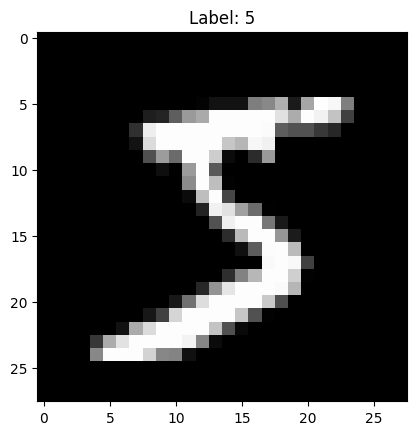

In [ ]:
# Step 1: Load and Explore Dataset

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Display the first image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
# Step 2: Normalize Data

print("Before normalization (first pixel row):", x_train[0][0])
x_train, x_test = x_train / 255.0, x_test / 255.0
print("After normalization (first pixel row):", x_train[0][0])

Before normalization (first pixel row): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
After normalization (first pixel row): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Step 3: Build the Model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Explanation:
# optimizer = 'adam' → adjusts learning automatically
# loss = 'sparse_categorical_crossentropy' → handles integer labels
# metrics = ['accuracy'] → shows training accuracy


In [ ]:
# Step 5: Train the Model

print("\nTraining for 5 epochs...")
history_5 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print("Training accuracy after 5 epochs:", history_5.history['accuracy'][-1])

print("\nTraining for 10 epochs...")
history_10 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
print("Training accuracy after 10 epochs:", history_10.history['accuracy'][-1])


Training for 5 epochs...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8793 - loss: 0.4269 - val_accuracy: 0.9666 - val_loss: 0.1094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9703 - loss: 0.1020 - val_accuracy: 0.9686 - val_loss: 0.1048
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9792 - loss: 0.0697 - val_accuracy: 0.9719 - val_loss: 0.0923
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9764 - val_loss: 0.0838
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9760 - val_loss: 0.0837
Training accuracy after 5 epochs: 0.9856666922569275

Training for 10 epochs...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9784 - val_loss: 0.0783
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9748 - val_l

In [ ]:
 #Step 6: Evaluate the Model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Compare training & test accuracy
print("Training accuracy (10 epochs):", history_10.history['accuracy'][-1])
print("Validation accuracy (10 epochs):", history_10.history['val_accuracy'][-1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.1228
Test Accuracy: 0.9802
Training accuracy (10 epochs): 0.9959333539009094
Validation accuracy (10 epochs): 0.9801999926567078


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted label for first test image: 7
Actual label: 7


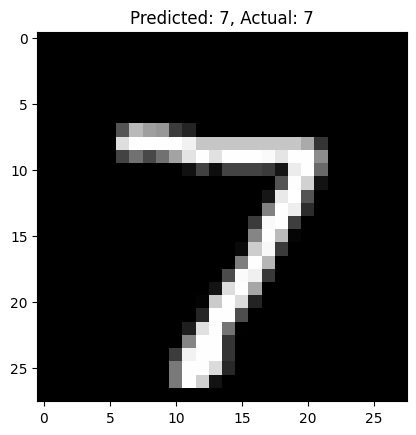

In [ ]:
# Step 7: Make Predictions

predictions = model.predict(x_test)
predicted_label = tf.argmax(predictions[0]).numpy()
print("Predicted label for first test image:", predicted_label)
print("Actual label:", y_test[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()

In [ ]:
# Step 8: Experiments

# 26. Add extra hidden layer (32 neurons)
print("\nAdding one more hidden layer (32 neurons)...")
model_extra = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model_extra.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_extra.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Adding one more hidden layer (32 neurons)...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8689 - loss: 0.4316 - val_accuracy: 0.9599 - val_loss: 0.1325
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9640 - loss: 0.1149 - val_accuracy: 0.9683 - val_loss: 0.1040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9763 - loss: 0.0757 - val_accuracy: 0.9715 - val_loss: 0.0955
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9816 - loss: 0.0568 - val_accuracy: 0.9741 - val_loss: 0.0863
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9859 - loss: 0.0424 - val_accuracy: 0.9726 - val_loss: 0.0972


In [ ]:
# 27. Change optimizer to 'sgd'
print("\nChanging optimizer to SGD...")
model_sgd = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sgd.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



Changing optimizer to SGD...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7051 - loss: 1.0817 - val_accuracy: 0.9083 - val_loss: 0.3188
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9094 - loss: 0.3141 - val_accuracy: 0.9289 - val_loss: 0.2572
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9281 - loss: 0.2556 - val_accuracy: 0.9345 - val_loss: 0.2272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9357 - loss: 0.2244 - val_accuracy: 0.9430 - val_loss: 0.1967
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9458 - loss: 0.1922 - val_accuracy: 0.9494 - val_loss: 0.1729


In [ ]:
# 28. Train for only 1 epoch
print("\nTraining for only 1 epoch...")
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))



Training for only 1 epoch...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8787 - loss: 0.4166 - val_accuracy: 0.9626 - val_loss: 0.1299


In [ ]:
# 29. Change activation to 'tanh'
print("\nChanging activation to tanh...")
model_tanh = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tanh.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



Changing activation to tanh...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8788 - loss: 0.4141 - val_accuracy: 0.9552 - val_loss: 0.1453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9622 - loss: 0.1276 - val_accuracy: 0.9699 - val_loss: 0.0989
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.9723 - val_loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0570 - val_accuracy: 0.9764 - val_loss: 0.0801
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9758 - val_loss: 0.0785


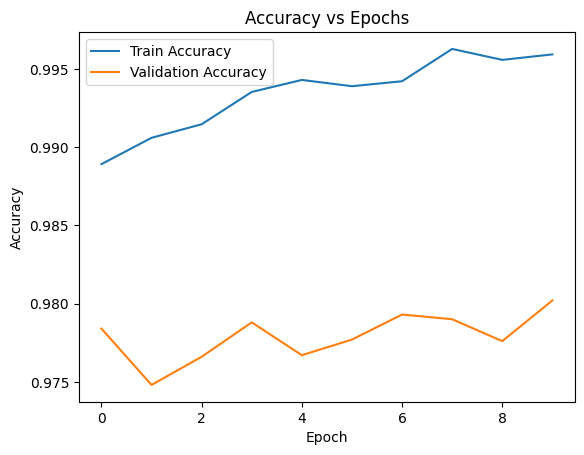

In [ ]:
# 30. Plot training accuracy vs epoch
plt.plot(history_10.history['accuracy'], label='Train Accuracy')
plt.plot(history_10.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()